In [82]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # Add parent directory to path

Image converted to FITS and saved as /Users/luisvalenzuela/Documents/Programs/CASA_test/data/processed/image_174_label_1/groundtruth/image_174_label_1.fits


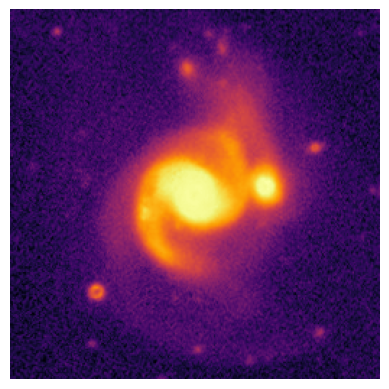

In [83]:
from src.preprocess.image_preprocessor import ImagePreprocessor

data = "../data/raw/galaxy10_decals/image_174_label_1.png"

image_name = data.split("/")[-1].split(".")[0]
output_folder = f"../data/processed/{image_name}"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

size = 256
preprocessor = ImagePreprocessor(image_path=data, width=size, height=size)
preprocessor.convert_to_fits(output_folder=f"../data/processed/{image_name}/groundtruth")
preprocessor.show_image()

2025-06-12 04:02:26	WARN	noise::CTPatchedInterp::interpolate	In caltable image_174_label_1.alma.out08.noisy.T.cal_sim_temp (Tf Jones):
2025-06-12 04:02:26	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-06-12 04:02:26	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.


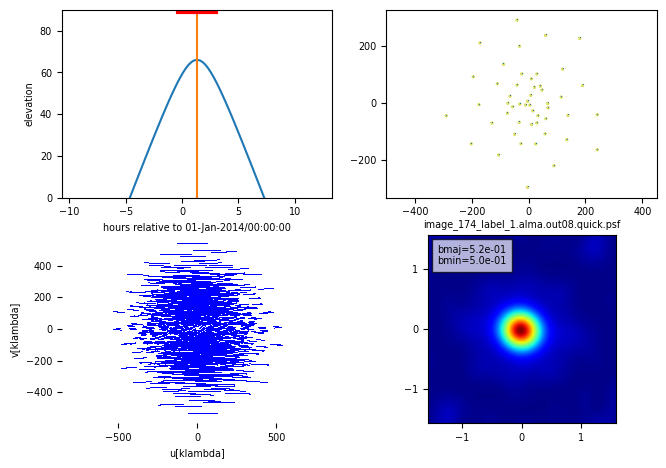

In [84]:
from src.preprocess.simulator import Simulator
from src.utils.plot import plot_ms

simoberve_config = {
    'antenna' : 'alma.out08.cfg',
    'totaltime' : 12000, # in seconds
    'noise': 50000,  # in Jy
}

simulator = Simulator(
    image="../data/raw/fits/image_174_label_1.fits",
    simobserve_config=simoberve_config,
    output_folder="../data/processed"
)

simulator.simulate()

2025-06-12 04:02:26	WARN	task_tclean::SIImageStore::restore (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPOSX14ARMPY310/casa6/casatools/src/code/synthesis/ImagerObjects/SIImageStore.cc, line 2298)	Restoring with an empty model image. Only residuals will be processed to form the output restored image.


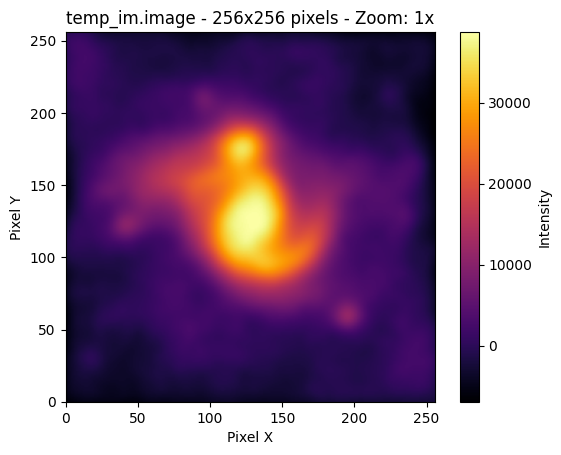

In [85]:
from src.utils.plot import plot_ms

ms_file = "../data/processed/image_174_label_1/ms/image_174_label_1.alma.out08.ms"
plot_ms(ms_file)